In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

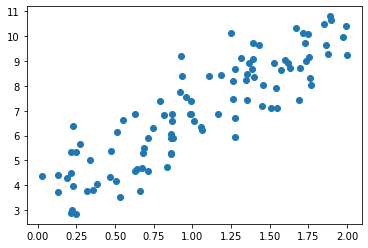

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [6]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.46142601],
       [3.38297167]])

In [9]:
#X_b

In [10]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.46142601],
       [10.22736935]])

In [12]:
#X_new_b

array([[1., 0.],
       [1., 2.]])

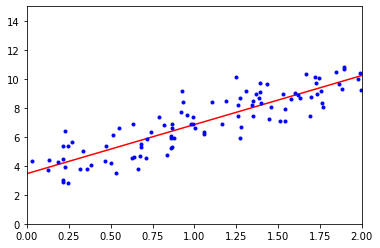

In [18]:
#이전case에 대한 paratetr가 있다면 이후 X값 에 따른 target값 예측가능?
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[3.46142601] [[3.38297167]]


array([[ 3.46142601],
       [10.22736935]])

In [35]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.46142601],
       [3.38297167]])

In [43]:
n_epochs = 50
t0, t1 = 5, 50

def learning_scheduls(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_scheduls(epoch * m + i)
        theta = theta - eta * gradients

In [44]:
theta

array([[3.41928408],
       [3.42467154]])

In [47]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [48]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.46072783]), array([3.40756921]))

In [49]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

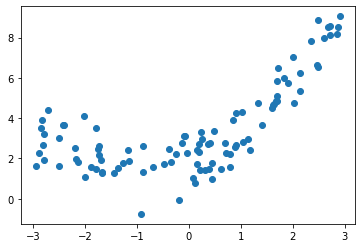

In [50]:
plt.scatter(X, y)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias= False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.92587886])

In [53]:
X_poly[0]

array([-0.92587886,  0.85725167])

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94167898]), array([[0.94381946, 0.49846486]]))

In [81]:
y_temp=lin_reg.predict(X_poly)

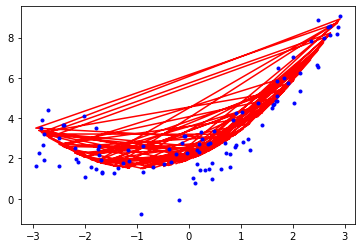

In [96]:
#이전case에 대한 paratetr가 있다면 이후 X값 에 따른 target값 예측가능?
plt.plot(X_poly[:,0], y_temp, "r-")
plt.plot(X, y, "b.")
#plt.axis([0, 2, 0, 15])
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
    plt.axis([0, 80, 0, 3])
    

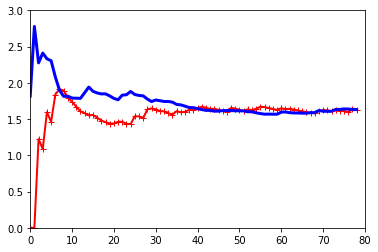

In [114]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

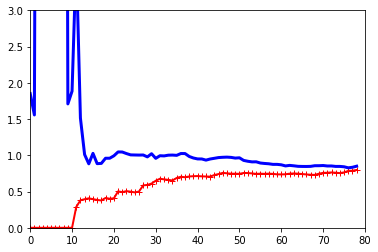

In [115]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)